EDA. <br>
En esta notebook se realizará y explicará el proceso del análisis exploratorio de datos (EDA)

In [1]:
import pandas as pd
import numpy as np
import json 
import ast
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
nltk.download('vader_lexicon')
nltk.download('punkt')
from nltk.sentiment import SentimentIntensityAnalyzer
import re

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\saulz\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\saulz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Carga de todos los archivos y dataframes con los que se trabajarán

In [171]:
direccion_games = "C:\\Users\\saulz\\proyecto_individual\\Dataset csv\\gamesdf.csv"
direccion_review = "C:\\Users\\saulz\\proyecto_individual\\Dataset csv\\reviewsdf_final.csv"
direccion_items = "C:\\Users\\saulz\\proyecto_individual\\Dataset csv\\itemsdf_final.csv"
direccion_genres = "C:\\Users\\saulz\\proyecto_individual\\Dataset csv\\genres_dummies.csv"
direccion_games_year = "C:\\Users\\saulz\\proyecto_individual\\Dataset csv\\gamesdf_year.csv"

dfgames = pd.read_csv(direccion_games, sep=",") 
dfreview = pd.read_csv(direccion_review, sep=",")
dfitems = pd.read_csv(direccion_items, sep=",")
dfgenres_dummies = pd.read_csv(direccion_genres, sep=",")
dfgames_year = pd.read_csv(direccion_games_year, sep=",")

Verificación de los dataframes

In [87]:
dfgames

,genres,app_name,release_date,price,item_id,developer
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
120438,"['Casual', 'Indie', 'Simulation', 'Strategy']",Colony On Mars,2018-01-04,1.99,773640.0,"Nikita ""Ghost_RUS"""
120439,"['Casual', 'Indie', 'Strategy']",LOGistICAL: South Africa,2018-01-04,4.99,733530.0,Sacada
120440,"['Indie', 'Racing', 'Simulation']",Russian Roads,2018-01-04,1.99,610660.0,Laush Dmitriy Sergeevich
120441,"['Casual', 'Indie']",EXIT 2 - Directions,2017-09-02,4.99,658870.0,"xropi,stev3ns"


In [101]:
dfreview

,user_id,item_id,recommend,review
0,76561197970982479,1250.0,True,Simple yet with great replayability. In my opi...
1,76561197970982479,22200.0,True,It's unique and worth a playthrough.
2,76561197970982479,43110.0,True,Great atmosphere. The gunplay can be a bit chu...
3,js41637,251610.0,True,I know what you think when you see this title ...
4,js41637,227300.0,True,For a simple (it's actually not all that simpl...
...,...,...,...,...
59328,76561198312638244,70.0,True,a must have classic from steam definitely wort...
59329,76561198312638244,362890.0,True,this game is a perfect remake of the original ...
59330,LydiaMorley,273110.0,True,had so much fun plaing this and collecting res...
59331,LydiaMorley,730.0,True,:D


In [35]:
dfitems

,user_id,items_count,steam_id,item_id,playtime_forever
0,76561197970982479,277,76561197970982479,10.0,6.0
1,76561197970982479,277,76561197970982479,20.0,0.0
2,76561197970982479,277,76561197970982479,30.0,7.0
3,76561197970982479,277,76561197970982479,40.0,0.0
4,76561197970982479,277,76561197970982479,50.0,0.0
...,...,...,...,...,...
5170010,76561198329548331,7,76561198329548331,373330.0,0.0
5170011,76561198329548331,7,76561198329548331,388490.0,3.0
5170012,76561198329548331,7,76561198329548331,521570.0,4.0
5170013,76561198329548331,7,76561198329548331,519140.0,3.0


Se verifica la información de cada df para verificar que tipos de datos tenemos en cada uno.

In [6]:
dfgames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120443 entries, 0 to 120442
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   genres        28851 non-null   object 
 1   app_name      32133 non-null   object 
 2   release_date  29782 non-null   object 
 3   price         30757 non-null   object 
 4   item_id       32132 non-null   float64
 5   developer     28836 non-null   object 
 6   year          120443 non-null  int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 6.4+ MB


In [7]:
dfgames.describe()

,item_id,year
count,3.213200e+04,120443.000000
mean,4.517616e+05,498.190497
std,1.827153e+05,869.223460
min,1.000000e+01,0.000000
25%,3.293025e+05,0.000000
50%,4.520700e+05,0.000000
75%,5.934025e+05,0.000000
max,2.028850e+06,2021.000000


In [8]:
dfreview.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59333 entries, 0 to 59332
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    59333 non-null  object 
 1   item_id    59305 non-null  float64
 2   recommend  59305 non-null  object 
 3   review     59275 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.8+ MB


In [9]:
dfreview.describe()

,item_id
count,59305.000000
mean,169935.176511
std,132029.464174
min,10.000000
25%,8930.000000
50%,218230.000000
75%,261760.000000
max,527340.000000


In [10]:
dfitems.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5170015 entries, 0 to 5170014
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   user_id           object 
 1   items_count       int64  
 2   steam_id          int64  
 3   item_id           float64
 4   playtime_forever  float64
dtypes: float64(2), int64(2), object(1)
memory usage: 197.2+ MB


In [11]:
dfitems.describe()

,items_count,steam_id,item_id,playtime_forever
count,5.170015e+06,5.170015e+06,5.153209e+06,5.153209e+06
mean,3.136999e+02,7.656120e+16,1.784481e+05,9.914951e+02
std,6.924635e+02,3.918190e+07,1.318598e+05,5.418204e+03
min,0.000000e+00,7.656120e+16,1.000000e+01,0.000000e+00
25%,7.100000e+01,7.656120e+16,3.446000e+04,0.000000e+00
50%,1.370000e+02,7.656120e+16,2.144200e+05,3.400000e+01
75%,2.750000e+02,7.656120e+16,2.664300e+05,3.550000e+02
max,7.762000e+03,7.656120e+16,5.307200e+05,6.427730e+05


Tratamiento de datos nulos. <br>
-Se realiza la busqueda de datos nulos en cada df. <br>
-Se procede a la eliminación de esos datos nulos.


Se verifica cada columna del dataframe en busca de datos nulos.

In [36]:
nulos_games = dfgames[dfgames['genres'].isnull()]
nulos_games

,genres,app_name,release_date,price,item_id,developer,year
0,NaN,NaN,NaN,NaN,NaN,NaN,0
1,NaN,NaN,NaN,NaN,NaN,NaN,0
2,NaN,NaN,NaN,NaN,NaN,NaN,0
3,NaN,NaN,NaN,NaN,NaN,NaN,0
4,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...
120426,NaN,Robotpencil Presents: Exercise: Brushwork,2018-01-03,3.99,775640.0,NaN,2018
120427,NaN,Robotpencil Presents: Creative Composition,2018-01-03,3.99,777930.0,NaN,2018
120428,NaN,The Gamble House,2016-11-19,4.99,775370.0,NaN,2016
120429,NaN,Kalen Chock Presents: 2017 Free Tutorial,2018-01-03,Free,777950.0,NaN,2018


In [37]:
nulos_games = dfgames[dfgames['app_name'].isnull()]
nulos_games

,genres,app_name,release_date,price,item_id,developer,year
0,NaN,NaN,NaN,NaN,NaN,NaN,0
1,NaN,NaN,NaN,NaN,NaN,NaN,0
2,NaN,NaN,NaN,NaN,NaN,NaN,0
3,NaN,NaN,NaN,NaN,NaN,NaN,0
4,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...
88305,NaN,NaN,NaN,NaN,NaN,NaN,0
88306,NaN,NaN,NaN,NaN,NaN,NaN,0
88307,NaN,NaN,NaN,NaN,NaN,NaN,0
88308,NaN,NaN,NaN,NaN,NaN,NaN,0


In [38]:
nulos_games = dfgames[dfgames['release_date'].isnull()]
nulos_games

,genres,app_name,release_date,price,item_id,developer,year
0,NaN,NaN,NaN,NaN,NaN,NaN,0
1,NaN,NaN,NaN,NaN,NaN,NaN,0
2,NaN,NaN,NaN,NaN,NaN,NaN,0
3,NaN,NaN,NaN,NaN,NaN,NaN,0
4,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...
120395,"['Action', 'Casual', 'Indie', 'Simulation']",Lonely Astronaut,NaN,NaN,755830.0,"Greyson Richey,Nicholas Lives",0
120396,"['Action', 'Adventure', 'Indie', 'Early Access']",RECHARGE COMPLETE,NaN,NaN,708070.0,rechargecomplete,0
120405,"['Action', 'Indie']",Tetrapulse,NaN,NaN,250440.0,The Amiable,0
120431,"['Casual', 'Indie', 'Simulation', 'Sports', 'E...",Cricket Club,NaN,NaN,772180.0,VersoVR,0


In [39]:
nulos_games = dfgames[dfgames['price'].isnull()]
nulos_games

,genres,app_name,release_date,price,item_id,developer,year
0,NaN,NaN,NaN,NaN,NaN,NaN,0
1,NaN,NaN,NaN,NaN,NaN,NaN,0
2,NaN,NaN,NaN,NaN,NaN,NaN,0
3,NaN,NaN,NaN,NaN,NaN,NaN,0
4,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...
120407,"['Action', 'Indie']",Infinos Gaiden,2018-01-19,NaN,771070.0,Picorinne Soft,2018
120419,['Sports'],International Online Soccer,2002-01-01,NaN,90007.0,I.O.S. Team,2002
120431,"['Casual', 'Indie', 'Simulation', 'Sports', 'E...",Cricket Club,NaN,NaN,772180.0,VersoVR,0
120433,"['Action', 'Adventure', 'Indie']",The spy who shot me™,2018-10-01,NaN,771810.0,Retro Army Limited,2018


In [15]:
nulos_games = dfgames[dfgames['item_id'].isnull()]
nulos_games

,genres,app_name,release_date,price,item_id,developer,year
0,NaN,NaN,NaN,NaN,NaN,NaN,0
1,NaN,NaN,NaN,NaN,NaN,NaN,0
2,NaN,NaN,NaN,NaN,NaN,NaN,0
3,NaN,NaN,NaN,NaN,NaN,NaN,0
4,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...
88306,NaN,NaN,NaN,NaN,NaN,NaN,0
88307,NaN,NaN,NaN,NaN,NaN,NaN,0
88308,NaN,NaN,NaN,NaN,NaN,NaN,0
88309,NaN,NaN,NaN,NaN,NaN,NaN,0


In [16]:
nulos_games = dfgames[dfgames['developer'].isnull()]
nulos_games

,genres,app_name,release_date,price,item_id,developer,year
0,NaN,NaN,NaN,NaN,NaN,NaN,0
1,NaN,NaN,NaN,NaN,NaN,NaN,0
2,NaN,NaN,NaN,NaN,NaN,NaN,0
3,NaN,NaN,NaN,NaN,NaN,NaN,0
4,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...
120426,NaN,Robotpencil Presents: Exercise: Brushwork,2018-01-03,3.99,775640.0,NaN,2018
120427,NaN,Robotpencil Presents: Creative Composition,2018-01-03,3.99,777930.0,NaN,2018
120428,NaN,The Gamble House,2016-11-19,4.99,775370.0,NaN,2016
120429,NaN,Kalen Chock Presents: 2017 Free Tutorial,2018-01-03,Free,777950.0,NaN,2018


In [20]:
nulos_reviews = dfreview[dfreview['item_id'].isnull()]
nulos_reviews

,user_id,item_id,recommend,review
137,gdxsd,NaN,NaN,NaN
177,76561198094224872,NaN,NaN,NaN
2559,76561198021575394,NaN,NaN,NaN
10080,cmuir37,NaN,NaN,NaN
13767,Jaysteeny,NaN,NaN,NaN
15493,ML8989,NaN,NaN,NaN
19184,76561198079215291,NaN,NaN,NaN
20223,76561198079342142,NaN,NaN,NaN
25056,76561198061996985,NaN,NaN,NaN
26257,76561198108286351,NaN,NaN,NaN


In [102]:
nulos_reviews = dfreview[dfreview['recommend'].isnull()]
nulos_reviews

,user_id,item_id,recommend,review
137,gdxsd,NaN,NaN,NaN
177,76561198094224872,NaN,NaN,NaN
2559,76561198021575394,NaN,NaN,NaN
10080,cmuir37,NaN,NaN,NaN
13767,Jaysteeny,NaN,NaN,NaN
15493,ML8989,NaN,NaN,NaN
19184,76561198079215291,NaN,NaN,NaN
20223,76561198079342142,NaN,NaN,NaN
25056,76561198061996985,NaN,NaN,NaN
26257,76561198108286351,NaN,NaN,NaN


In [22]:
nulos_reviews = dfreview[dfreview['review'].isnull()]
nulos_reviews

,user_id,item_id,recommend,review
137,gdxsd,NaN,NaN,NaN
177,76561198094224872,NaN,NaN,NaN
2559,76561198021575394,NaN,NaN,NaN
3098,2ZESTY4ME,550.0,True,NaN
4619,76561198093337643,550.0,True,NaN
10080,cmuir37,NaN,NaN,NaN
13767,Jaysteeny,NaN,NaN,NaN
15493,ML8989,NaN,NaN,NaN
15981,terencemok,218620.0,True,NaN
19184,76561198079215291,NaN,NaN,NaN


In [40]:
nulos_items = dfitems[dfitems['item_id'].isnull()]
nulos_items

,user_id,items_count,steam_id,item_id,playtime_forever
3733,Wackky,0,76561198039117046,NaN,NaN
3849,76561198079601835,0,76561198079601835,NaN,NaN
6019,hellom8o,0,76561198117222320,NaN,NaN
6523,starkillershadow553,0,76561198059648579,NaN,NaN
7237,darkenkane,0,76561198058876001,NaN,NaN
...,...,...,...,...,...
5169470,76561198316380182,0,76561198316380182,NaN,NaN
5169471,76561198316970597,0,76561198316970597,NaN,NaN
5169472,76561198318100691,0,76561198318100691,NaN,NaN
5170006,XxLaughingJackClown77xX,0,76561198328759259,NaN,NaN


In [24]:
nulos_items = dfitems[dfitems['playtime_forever'].isnull()]
nulos_items

,user_id,items_count,steam_id,item_id,playtime_forever
3733,Wackky,0,76561198039117046,NaN,NaN
3849,76561198079601835,0,76561198079601835,NaN,NaN
6019,hellom8o,0,76561198117222320,NaN,NaN
6523,starkillershadow553,0,76561198059648579,NaN,NaN
7237,darkenkane,0,76561198058876001,NaN,NaN
...,...,...,...,...,...
5169470,76561198316380182,0,76561198316380182,NaN,NaN
5169471,76561198316970597,0,76561198316970597,NaN,NaN
5169472,76561198318100691,0,76561198318100691,NaN,NaN
5170006,XxLaughingJackClown77xX,0,76561198328759259,NaN,NaN


Se eliminan los registros en donde TODOS los datos eran nulos econtrados

In [88]:
dfgames = dfgames.dropna(how='all')
dfgames

,genres,app_name,release_date,price,item_id,developer
88310,"['Action', 'Casual', 'Indie', 'Simulation', 'S...",Lost Summoner Kitty,2018-01-04,4.99,761140.0,Kotoshiro
88311,"['Free to Play', 'Indie', 'RPG', 'Strategy']",Ironbound,2018-01-04,Free To Play,643980.0,Secret Level SRL
88312,"['Casual', 'Free to Play', 'Indie', 'Simulatio...",Real Pool 3D - Poolians,2017-07-24,Free to Play,670290.0,Poolians.com
88313,"['Action', 'Adventure', 'Casual']",弹炸人2222,2017-12-07,0.99,767400.0,彼岸领域
88314,NaN,Log Challenge,NaN,2.99,773570.0,NaN
...,...,...,...,...,...,...
120438,"['Casual', 'Indie', 'Simulation', 'Strategy']",Colony On Mars,2018-01-04,1.99,773640.0,"Nikita ""Ghost_RUS"""
120439,"['Casual', 'Indie', 'Strategy']",LOGistICAL: South Africa,2018-01-04,4.99,733530.0,Sacada
120440,"['Indie', 'Racing', 'Simulation']",Russian Roads,2018-01-04,1.99,610660.0,Laush Dmitriy Sergeevich
120441,"['Casual', 'Indie']",EXIT 2 - Directions,2017-09-02,4.99,658870.0,"xropi,stev3ns"


In [172]:
dfgames_year = dfgames_year.drop(dfgames_year.index[0:88310])
dfgames_year

,genres,app_name,release_date,price,item_id,developer,year
88310,"['Action', 'Casual', 'Indie', 'Simulation', 'S...",Lost Summoner Kitty,2018-01-04,4.99,761140.0,Kotoshiro,2018
88311,"['Free to Play', 'Indie', 'RPG', 'Strategy']",Ironbound,2018-01-04,Free To Play,643980.0,Secret Level SRL,2018
88312,"['Casual', 'Free to Play', 'Indie', 'Simulatio...",Real Pool 3D - Poolians,2017-07-24,Free to Play,670290.0,Poolians.com,2017
88313,"['Action', 'Adventure', 'Casual']",弹炸人2222,2017-12-07,0.99,767400.0,彼岸领域,2017
88314,NaN,Log Challenge,NaN,2.99,773570.0,NaN,0
...,...,...,...,...,...,...,...
120438,"['Casual', 'Indie', 'Simulation', 'Strategy']",Colony On Mars,2018-01-04,1.99,773640.0,"Nikita ""Ghost_RUS""",2018
120439,"['Casual', 'Indie', 'Strategy']",LOGistICAL: South Africa,2018-01-04,4.99,733530.0,Sacada,2018
120440,"['Indie', 'Racing', 'Simulation']",Russian Roads,2018-01-04,1.99,610660.0,Laush Dmitriy Sergeevich,2018
120441,"['Casual', 'Indie']",EXIT 2 - Directions,2017-09-02,4.99,658870.0,"xropi,stev3ns",2017


Se procede a cambiar el valor de los datos nulos y se verifica los cambios con una mascara.

In [95]:
dfgames['genres']  = dfgames['genres'].fillna('sin dato') 
dfgames[dfgames['genres'] == 'sin dato']

dfgames['release_date']  = dfgames['release_date'].fillna('sin dato') 
dfgames[dfgames['release_date'] == 'sin dato']

dfgames['price']  = dfgames['price'].fillna('sin dato') 
dfgames[dfgames['price'] == 'sin dato']

dfgames['developer']  = dfgames['developer'].fillna('sin dato')
dfgames[dfgames['developer'] == 'sin dato']

C:\Users\saulz\AppData\Local\Temp\ipykernel_22240\3518305790.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfgames['genres']  = dfgames['genres'].fillna('sin dato')
C:\Users\saulz\AppData\Local\Temp\ipykernel_22240\3518305790.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfgames['release_date']  = dfgames['release_date'].fillna('sin dato')
C:\Users\saulz\AppData\Local\Temp\ipykernel_22240\3518305790.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

,genres,app_name,release_date,price,item_id,developer
88314,sin dato,Log Challenge,sin dato,2.99,773570.0,sin dato
88321,sin dato,Icarus Six Sixty Six,sin dato,Free,724910.0,sin dato
88329,sin dato,After Life VR,sin dato,4.99,772590.0,sin dato
88330,sin dato,Kitty Hawk,sin dato,2.99,640250.0,sin dato
88332,sin dato,Mortars VR,sin dato,0.99,711440.0,sin dato
...,...,...,...,...,...,...
120426,sin dato,Robotpencil Presents: Exercise: Brushwork,2018-01-03,3.99,775640.0,sin dato
120427,sin dato,Robotpencil Presents: Creative Composition,2018-01-03,3.99,777930.0,sin dato
120428,sin dato,The Gamble House,2016-11-19,4.99,775370.0,sin dato
120429,sin dato,Kalen Chock Presents: 2017 Free Tutorial,2018-01-03,Free,777950.0,sin dato


In [94]:
dfgames['item_id']  = dfgames['item_id'].fillna('200260')
dfgames[dfgames['item_id'] == '200260']

C:\Users\saulz\AppData\Local\Temp\ipykernel_22240\640740567.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfgames['item_id']  = dfgames['item_id'].fillna('200260')


,genres,app_name,release_date,price,item_id,developer
119269,"['Action', 'Adventure']",Batman: Arkham City - Game of the Year Edition,2012-09-07,19.99,200260,"Rocksteady Studios,Feral Interactive (Mac)"


In [173]:
dfgames_year['genres']  = dfgames_year['genres'].fillna('sin dato') 
dfgames_year[dfgames_year['release_date'] == 'sin dato']

dfgames_year['release_date']  = dfgames_year['release_date'].fillna('sin dato') 
dfgames_year[dfgames_year['release_date'] == 'sin dato']

dfgames_year['price']  = dfgames_year['price'].fillna('sin dato') 
dfgames_year[dfgames_year['price'] == 'sin dato']


dfgames_year['developer']  = dfgames_year['developer'].fillna('sin dato') 
dfgames_year[dfgames_year['developer'] == 'sin dato']

,genres,app_name,release_date,price,item_id,developer,year
88314,sin dato,Log Challenge,sin dato,2.99,773570.0,sin dato,0
88321,sin dato,Icarus Six Sixty Six,sin dato,Free,724910.0,sin dato,0
88329,sin dato,After Life VR,sin dato,4.99,772590.0,sin dato,0
88330,sin dato,Kitty Hawk,sin dato,2.99,640250.0,sin dato,0
88332,sin dato,Mortars VR,sin dato,0.99,711440.0,sin dato,0
...,...,...,...,...,...,...,...
120426,sin dato,Robotpencil Presents: Exercise: Brushwork,2018-01-03,3.99,775640.0,sin dato,2018
120427,sin dato,Robotpencil Presents: Creative Composition,2018-01-03,3.99,777930.0,sin dato,2018
120428,sin dato,The Gamble House,2016-11-19,4.99,775370.0,sin dato,2016
120429,sin dato,Kalen Chock Presents: 2017 Free Tutorial,2018-01-03,Free,777950.0,sin dato,2018


In [103]:
dfreview['item_id']  = dfreview['item_id'].fillna('sin dato') 
dfreview[dfreview['item_id'] == 'sin dato']

dfreview['recommend']  = dfreview['recommend'].fillna('sin dato') 
dfreview[dfreview['recommend'] == 'sin dato']

dfreview['review']  = dfreview['review'].fillna('sin dato') 
dfreview[dfreview['review'] == 'sin dato']

,user_id,item_id,recommend,review
137,gdxsd,sin dato,sin dato,sin dato
177,76561198094224872,sin dato,sin dato,sin dato
2559,76561198021575394,sin dato,sin dato,sin dato
3098,2ZESTY4ME,550.0,True,sin dato
4619,76561198093337643,550.0,True,sin dato
10080,cmuir37,sin dato,sin dato,sin dato
13767,Jaysteeny,sin dato,sin dato,sin dato
15493,ML8989,sin dato,sin dato,sin dato
15981,terencemok,218620.0,True,sin dato
19184,76561198079215291,sin dato,sin dato,sin dato


In [104]:
dfitems['item_id']  = dfitems['item_id'].fillna('0')  
dfitems[dfitems['item_id'] == '0']

dfitems['playtime_forever']  = dfitems['playtime_forever'].fillna('0')
dfitems[dfitems['playtime_forever'] == '0']

,user_id,items_count,steam_id,item_id,playtime_forever
3733,Wackky,0,76561198039117046,0,0
3849,76561198079601835,0,76561198079601835,0,0
6019,hellom8o,0,76561198117222320,0,0
6523,starkillershadow553,0,76561198059648579,0,0
7237,darkenkane,0,76561198058876001,0,0
...,...,...,...,...,...
5169470,76561198316380182,0,76561198316380182,0,0
5169471,76561198316970597,0,76561198316970597,0,0
5169472,76561198318100691,0,76561198318100691,0,0
5170006,XxLaughingJackClown77xX,0,76561198328759259,0,0


Tratamiento de datos duplicados

-Se verifica la existencia de datos duplicados en cada dataframe. <br>
-Se corrobara que los datos realmente esten duplicados. <br>
-Se procede a la eliminación de los datos duplicados. <br>

Verificación de datos duplicados

In [55]:
duplicados= dfgames[dfgames.duplicated(subset='item_id')]
duplicados

,genres,app_name,release_date,price,item_id,developer,year
102881,['Action'],Wolfenstein II: The New Colossus,2017-10-26,59.99,612880.0,Machine Games,2017


In [56]:
duplicados= dfgames[dfgames.duplicated(subset='app_name')]
duplicados

,genres,app_name,release_date,price,item_id,developer,year
89818,"['Adventure', 'Casual', 'Indie']",The Dream Machine: Chapter 4,2013-08-05,sin dato,94304.0,Cockroach Inc.,2013
97762,"['Action', 'Casual', 'Indie']",Rumpus,2017-04-12,14.99,542220.0,Polyraptor Games,2017
99148,"['Casual', 'Indie', 'Simulation']",Slice&Dice,2017-08-04,4.99,682340.0,VRotein,2017
100230,"['Indie', 'Massively Multiplayer', 'Strategy']",WARZONE,2017-10-17,9.99,712230.0,KEA Games,2017
101729,sin dato,Escape Room,sin dato,Free,758210.0,sin dato,0
101961,"['Action', 'Adventure', 'Indie']",The Fog,2017-12-01,9.99,739030.0,Horizon Games,2017
102881,['Action'],Wolfenstein II: The New Colossus,2017-10-26,59.99,612880.0,Machine Games,2017
103179,sin dato,Luna,sin dato,14.99,605770.0,sin dato,0
104763,sin dato,Archangel,sin dato,29.99,553880.0,sin dato,0
105106,"['Adventure', 'Strategy']",Castles,1991-01-02,9.99,666660.0,Quicksilver Software,1991


Se corroboran de manera individual con cada nombre los valores que aparecen como duplicados en la columna app_name

In [60]:
dfgames[dfgames['app_name'] == 'The Dream Machine: Chapter 4']

,genres,app_name,release_date,price,item_id,developer,year
89817,"['Adventure', 'Casual', 'Indie']",The Dream Machine: Chapter 4,2013-08-05,4.99,93304.0,Cockroach Inc.,2013
89818,"['Adventure', 'Casual', 'Indie']",The Dream Machine: Chapter 4,2013-08-05,sin dato,94304.0,Cockroach Inc.,2013


In [66]:
duplicados= dfreview[dfreview.duplicated(subset=['user_id','item_id'])]
duplicados

,user_id,item_id,recommend,review
1114,bokkkbokkk,346110.0,True,yep
2894,ImSeriouss,218620.0,True,"Good graphics, fun heists! A bit laggy"
2895,ImSeriouss,105600.0,True,So fun! DEFINITELY NOT RIP OFF OF MINECRAFT! e...
2896,ImSeriouss,570.0,True,bobo pinoy
2897,ImSeriouss,211820.0,True,If you want to play this game.. expect glithes...
...,...,...,...,...
44456,76561198092022514,422400.0,True,Muy entretenido y una coleccion de armas prome...
44457,76561198092022514,218620.0,True,"Tiene una jugabilidad y tematica muy buena :D,..."
44458,76561198092022514,261820.0,True,"Buen juego, no importa el desarrrollo que tien..."
44459,76561198092022514,224260.0,True,exelente aporte :D¡¡¡ es una buen mod basado e...


In [71]:
duplicados= dfitems[dfitems.duplicated(subset=['user_id','item_id'])]
duplicados

,user_id,items_count,steam_id,item_id,playtime_forever
75762,bokkkbokkk,0,76561198006988360,0,sin dato
164518,Nikiad,109,76561198084006094,20.0,5.0
164519,Nikiad,109,76561198084006094,50.0,0.0
164520,Nikiad,109,76561198084006094,70.0,0.0
164521,Nikiad,109,76561198084006094,130.0,0.0
...,...,...,...,...,...
4910939,76561198080057659,39,76561198080057659,221910.0,53.0
4910940,76561198080057659,39,76561198080057659,261030.0,253.0
4910941,76561198080057659,39,76561198080057659,273110.0,0.0
4910942,76561198080057659,39,76561198080057659,730.0,0.0


Eliminación de los valores duplicados

In [105]:
dfgames=dfgames.drop(89818)
dfgames=dfgames.drop(94826)
dfgames=dfgames.drop(102202)
dfgames=dfgames.drop(115979)

In [174]:
dfgames_year=dfgames_year.drop(89818)
dfgames_year=dfgames_year.drop(94826)
dfgames_year=dfgames_year.drop(102202)
dfgames_year=dfgames_year.drop(115979)

In [107]:
dfreview =dfreview.drop_duplicates(subset=['user_id','item_id'], keep='first')

In [63]:
dfitems= dfitems.drop_duplicates(subset=['user_id', 'item_id'], keep='first')

Sentiment analysis

Para la realización del análisis de sentimiento se realizan los siguientes pasos. <br>
-Se convierten todo el texto en minúsculas. <br>
-Se elimina cualquier carácter que no sea una letra, número o espacio en blanco con una cadena vacía. <br>
-Se convierten todos los valores a str para su tokenización. <br>
-Se define una función para realizar el analisis de sentimiento.

In [108]:
#Se convierten todo el texto en minúsculas.
dfreview['review']= dfreview['review'].str.lower()
#Se elimina cualquier carácter que no sea una letra, número o espacio en blanco con una cadena vacía
dfreview['review']= dfreview['review'].str.replace('[^\w\s]', '', regex=True)
#Se convierten todos los valores a str para su tokenización
dfreview['review'] = dfreview['review'].astype(str)
#Se define una función para realizar el analisis de sentimiento.
def analizar_sentimiento(texto):
    if isinstance(texto, str):
        if texto.strip() != '':

            sia = SentimentIntensityAnalyzer()
            sentimiento = sia.polarity_scores(texto)["compound"]

            if sentimiento > 0.2:
                return 2
            elif sentimiento < -0.2:
                return 0

            else: return 1

    return 1
dfreview["sentiment_analysis"] = dfreview["review"].fillna('').apply(lambda i: analizar_sentimiento(i))

C:\Users\saulz\AppData\Local\Temp\ipykernel_22240\2592580789.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfreview['review']= dfreview['review'].str.lower()
C:\Users\saulz\AppData\Local\Temp\ipykernel_22240\2592580789.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfreview['review']= dfreview['review'].str.replace('[^\w\s]', '', regex=True)
C:\Users\saulz\AppData\Local\Temp\ipykernel_22240\2592580789.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Corroboración de la creación de la columna "sentiment_analysis"

In [109]:
dfreview

,user_id,item_id,recommend,review,sentiment_analysis
0,76561197970982479,1250.0,True,simple yet with great replayability in my opin...,2
1,76561197970982479,22200.0,True,its unique and worth a playthrough,2
2,76561197970982479,43110.0,True,great atmosphere the gunplay can be a bit chun...,2
3,js41637,251610.0,True,i know what you think when you see this title ...,2
4,js41637,227300.0,True,for a simple its actually not all that simple ...,2
...,...,...,...,...,...
59328,76561198312638244,70.0,True,a must have classic from steam definitely wort...,2
59329,76561198312638244,362890.0,True,this game is a perfect remake of the original ...,2
59330,LydiaMorley,273110.0,True,had so much fun plaing this and collecting res...,2
59331,LydiaMorley,730.0,True,d,1


Eliminación de la columna review

In [110]:
dfreview.drop(['review'], axis=1, inplace=True)
dfreview

C:\Users\saulz\AppData\Local\Temp\ipykernel_22240\1920769651.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfreview.drop(['review'], axis=1, inplace=True)


,user_id,item_id,recommend,sentiment_analysis
0,76561197970982479,1250.0,True,2
1,76561197970982479,22200.0,True,2
2,76561197970982479,43110.0,True,2
3,js41637,251610.0,True,2
4,js41637,227300.0,True,2
...,...,...,...,...
59328,76561198312638244,70.0,True,2
59329,76561198312638244,362890.0,True,2
59330,LydiaMorley,273110.0,True,2
59331,LydiaMorley,730.0,True,1


Nube de palabras

Creo un dataframe para hacer la nube de palabras y poder alterar la columna a genres sin generar problemas en análisis futuros en el df orginal.

In [111]:
dfgames_nube = dfgames.copy()

In [112]:
texto = ' '.join(dfgames_nube['genres'])


Se normaliza todas la palabras del str texto quitanto mayusculas y caracteres especiales

In [113]:
texto = texto.lower()

def caracteres_especiales(texto):
    return re.sub(r'[^a-zA-Z0-9\s]', '', texto)
texto = caracteres_especiales(texto)
texto

'action casual indie simulation strategy free to play indie rpg strategy casual free to play indie simulation sports action adventure casual sin dato action adventure simulation free to play indie simulation sports free to play indie simulation sports free to play indie simulation sports casual indie racing simulation action indie simulation early access sin dato action adventure casual indie rpg casual indie casual indie simulation adventure casual indie simulation strategy free to play indie simulation sports adventure casual indie simulation strategy free to play indie simulation sports sin dato sin dato action adventure indie sin dato racing simulation sports racing simulation sports action indie sin dato action indie racing action action indie rpg sin dato casual indie strategy action casual indie simulation action casual indie massively multiplayer simulation sports strategy adventure casual indie sin dato action adventure rpg adventure casual indie rpg strategy strategy action i

Creación de la nube de palabras para poder analizar los generos más repetidos.

(-0.5, 999.5, 699.5, -0.5)

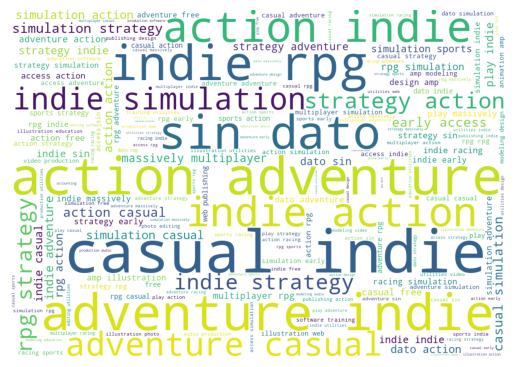

In [114]:
np = WordCloud(width=1000, height=700,  background_color='white').generate(texto)
plt.imshow(np)
plt.axis('off')

Creación de gráficas para el análisi de datos relevantes.

Con esta grafico podemos determinar que hay muy pocos jugadores con grandes cantidades de horas jugadas, la mayoria de los usuarios tienen pocas horas jugadas.

In [118]:
dfitems['playtime_forever'] = dfitems['playtime_forever'].astype(int)

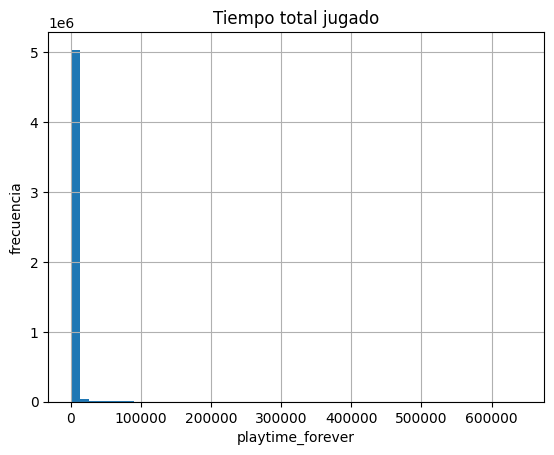

In [121]:
dfitems['playtime_forever'].hist(bins=50)
plt.title('Tiempo total jugado')
plt.xlabel('playtime_forever')
plt.ylabel('frecuencia')
plt.show()

Con este conteo de valores podemos ver de forma más precisa los valores, asi como posibles outiliers.

In [120]:
frecuencia_de_valores = dfitems['playtime_forever'].value_counts()
frecuencia_de_valores

playtime_forever
0        1864444
1         101586
2          34391
3          31530
4          29127
          ...   
64676          1
53328          1
44029          1
33119          1
34753          1
Name: count, Length: 48861, dtype: int64

In [122]:
dfitems[dfitems['playtime_forever'] >= 180480]

,user_id,items_count,steam_id,item_id,playtime_forever
4647,thequeenpanda,524,76561198010803705,4000.0,255613
5171,death-hunter,121,76561198018556265,4000.0,243840
6836,wirlom,50,76561198096285145,550.0,184933
9017,76561198078738103,33,76561198078738103,4000.0,303466
17414,76561197990792016,113,76561197990792016,730.0,189556
...,...,...,...,...,...
5006218,76561198088238670,123,76561198088238670,4000.0,193520
5030094,76561198090486706,44,76561198090486706,226320.0,231136
5125057,76561198111731944,5,76561198111731944,243870.0,278011
5149076,talibanstorm,16,76561198137551215,730.0,201190


Con esto podemos confirmar que todos los valores mostrados en la lista anterior son outliers, debido a que la plataforma steam se abrió el 12 de septiembre de 2003 y de esa fecha a la fecha de hoy han transcurrido 180,480 horas, debido a eso, todos los registros que superen esa cantida son un error.

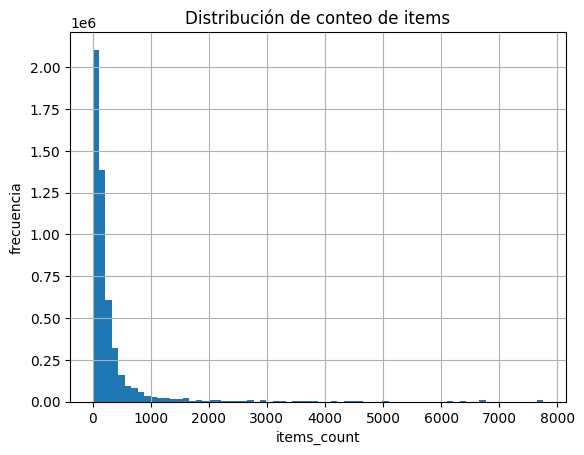

In [123]:
dfitems['items_count'].hist(bins=70)
plt.title('Distribución de conteo de items')
plt.xlabel('items_count')
plt.ylabel('frecuencia')
plt.show()

Con este conteo de items podemos inferir que una muy pequeña cantidad de jugadores pasan de los 1000 items, pudiendo considerar a estos como outliers, la mayoria de los jugadores cuentan con pocos items.

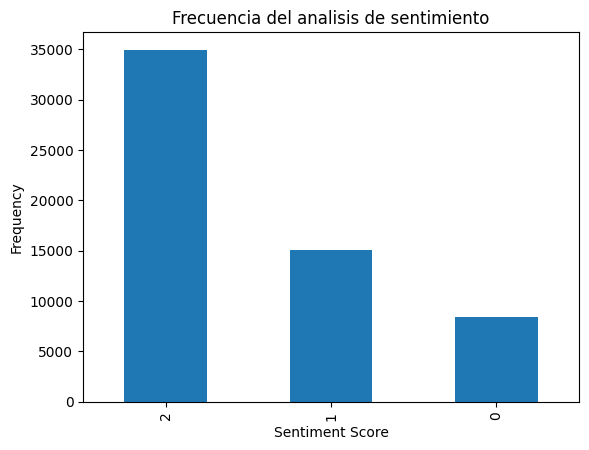

In [124]:
dfreview['sentiment_analysis'].value_counts().plot(kind='bar')
plt.title('Frecuencia del analisis de sentimiento')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

Con este análisis rapido podemos concluir en que la mayoria de los jugadores tienen una experiencia positiva con los juegos que han jugado

Análisis de correlaciones bi y multivariado

In [125]:
dfreview_copia = dfreview.copy()

In [126]:
dfreview_copia.drop(dfreview_copia.index[dfreview_copia['item_id']== 'sin dato'], inplace=True)

In [127]:
dfreview_copia['item_id'] = dfreview_copia['item_id'].astype(str)

In [128]:
dfreview_copia['item_id'] = dfreview_copia['item_id'].str.replace('.0','')
dfreview_copia 

,user_id,item_id,recommend,sentiment_analysis
0,76561197970982479,1250,True,2
1,76561197970982479,22200,True,2
2,76561197970982479,43110,True,2
3,js41637,251610,True,2
4,js41637,227300,True,2
...,...,...,...,...
59328,76561198312638244,70,True,2
59329,76561198312638244,362890,True,2
59330,LydiaMorley,273110,True,2
59331,LydiaMorley,730,True,1


In [129]:
dfgenres_dummies_copia = dfgenres_dummies.copy()

In [130]:
dfgenres_dummies_copia['item_id'] = dfgenres_dummies_copia['item_id'].astype(str) 

In [131]:
dfgenres_dummies_copia

,item_id,Accounting,Action,Adventure,Animation & Modeling,Audio Production,Casual,Design & Illustration,Early Access,Education,...,Photo Editing,RPG,Racing,Simulation,Software Training,Sports,Strategy,Utilities,Video Production,Web Publishing
0,761140,0,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,643980,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,670290,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3,767400,0,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,772540,0,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28845,745400,0,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28846,773640,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
28847,733530,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
28848,610660,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0


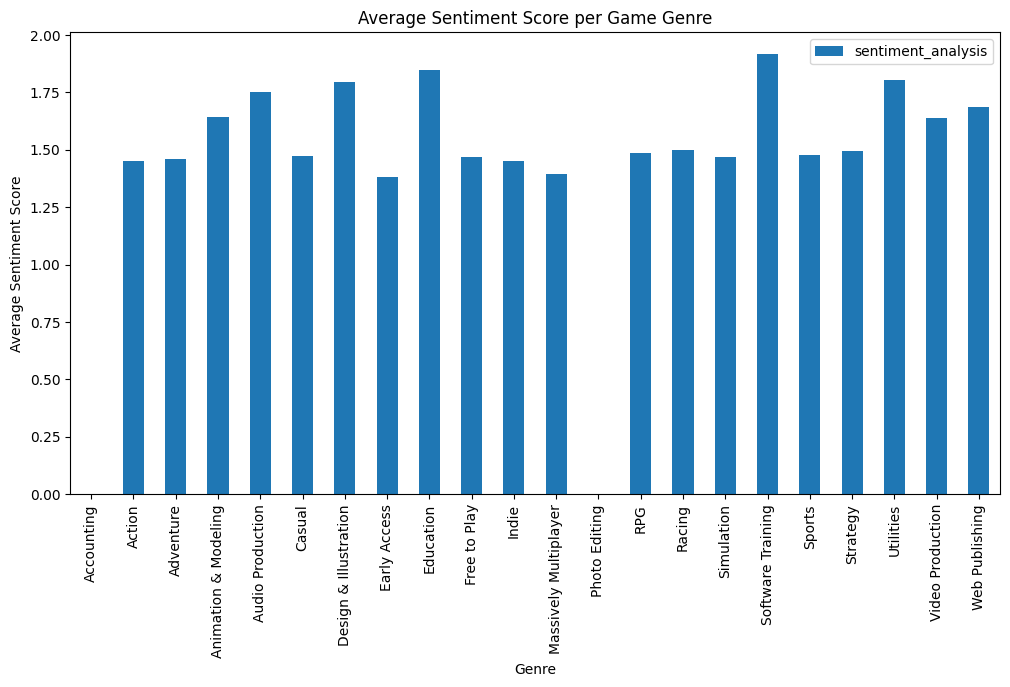

In [132]:
#df_genre_reviews = dfgenres_dummies_copia.merge(dfreview, on='item_id')
df_genre_reviews = pd.merge(dfgenres_dummies_copia, dfreview_copia, on='item_id' )

genre_columns = dfgenres_dummies_copia.columns[1:]  
avg_sentiment_per_genre = {genre: df_genre_reviews[df_genre_reviews[genre] == 1]['sentiment_analysis'].mean() for genre in genre_columns}

avg_sentiment_df = pd.DataFrame(list(avg_sentiment_per_genre.items()), columns=['Genre', 'sentiment_analysis'])

avg_sentiment_df.plot(x='Genre', y='sentiment_analysis', kind='bar', figsize=(12, 6))
plt.title('Average Sentiment Score per Game Genre')
plt.xlabel('Genre')
plt.ylabel('Average Sentiment Score')
plt.show()

Creación de copias de los dataframes para guardarlos como archivos tipo parquet para utilizarlos en las funciones

In [208]:
dfgames_year_parquet = dfgames_year.copy()
dfreview_parquet = dfreview.copy()
dfitems_parquet = dfitems.copy() 

In [209]:
dfgames_year_parquet["year"] = dfgames_year_parquet["year"].fillna(0)
dfgames_year_parquet["year"] = dfgames_year_parquet["year"].astype(int)

dfgames_year_parquet = dfgames_year_parquet.dropna(subset=['item_id'])
dfgames_year_parquet['item_id'] = dfgames_year_parquet['item_id'].astype(int)

dfgames_year_parquet = dfgames_year_parquet.drop(dfgames_year_parquet[dfgames_year_parquet['developer'] == 'sin dato'].index)
dfgames_year_parquet[dfgames_year_parquet['developer'] == 'sin dato']
dfgames_year_parquet["developer"] = dfgames_year_parquet["developer"].astype(str)

drop_columnas = ["genres", "app_name", "release_date"]
dfgames_year_parquet = dfgames_year_parquet.drop(drop_columnas, axis=1)
dfgames_year_parquet

dfgames_year_parquet.to_parquet('games_year_parquet.parquet')

,price,item_id,developer,year
88310,4.99,761140,Kotoshiro,2018
88311,Free To Play,643980,Secret Level SRL,2018
88312,Free to Play,670290,Poolians.com,2017
88313,0.99,767400,彼岸领域,2017
88315,3.99,772540,Trickjump Games Ltd,2018
...,...,...,...,...
120437,1.99,745400,Bidoniera Games,2018
120438,1.99,773640,"Nikita ""Ghost_RUS""",2018
120439,4.99,733530,Sacada,2018
120440,1.99,610660,Laush Dmitriy Sergeevich,2018


In [164]:
dfreview_parquet['item_id'] = dfreview_parquet['item_id'].astype(str)

dfreview_parquet = dfreview_parquet.drop(dfreview_parquet[dfreview_parquet['recommend'] == 'sin dato'].index)

dfreview_parquet.to_parquet('dfreview_parquet.parquet')

In [165]:
dfitems_parquet['item_id'] = dfitems_parquet['item_id'].astype(str)

dfitems_parquet.to_parquet('dfitems_parquet.parquet')